In [8]:
import numpy as np
import matplotlib.pyplot as plt

## 7.1.21, 7.2.8, 7.6.2

# ======================= 7.1.21  =======================

In [9]:
def f(t, y):
    return y / t - 2 / t**2

t0 = 1.0
y0 = 1.0
T = 2.0 # Видимо опечатка? Написано T = 1.0
h = 0.1

In [10]:
def euler(f, t0, y0, T, h):
    n = int((T - t0) / h)
    t = np.linspace(t0, T, n+1)
    y = np.zeros(n+1)
    y[0] = y0
    for i in range(n):
        y[i+1] = y[i] + h * f(t[i], y[i])
    return t, y

def rkfixed(f, t0, y0, T, h):
    n = int((T - t0) / h)
    t = np.linspace(t0, T, n+1)
    y = np.zeros(n+1)
    y[0] = y0
    for i in range(n):
        k1 = h * f(t[i], y[i])
        k2 = h * f(t[i] + 0.5*h, y[i] + 0.5*k1)
        k3 = h * f(t[i] + 0.5*h, y[i] + 0.5*k2)
        k4 = h * f(t[i] + h, y[i] + k3)
        y[i+1] = y[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
    return t, y

In [11]:
# Compute solutions using both methods
t_euler, y_euler = euler(f, t0, y0, T, h)
t_rk, y_rk = rkfixed(f, t0, y0, T, h)

def exact_solution(t):
    return 1 / t

t_exact = np.linspace(t0, T, 100)
y_exact = exact_solution(t_exact)

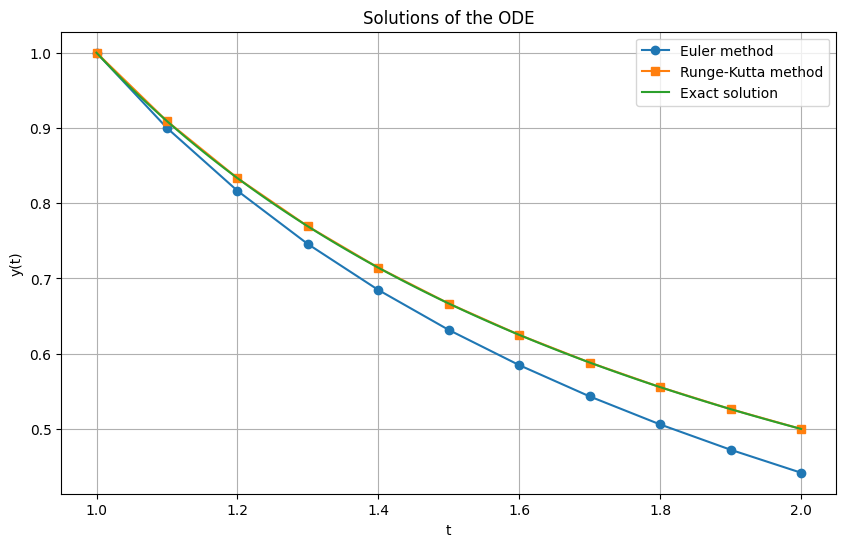

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(t_euler, y_euler, 'o-', label='Euler method')
plt.plot(t_rk, y_rk, 's-', label='Runge-Kutta method')
plt.plot(t_exact, y_exact, '-', label='Exact solution')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.title('Solutions of the ODE')
plt.grid(True)
plt.show()


In [22]:
def print_table(t, exact, euler, rk):
    print(f"{'t':>8} {'Exact':>13} {'Euler':>15} {'Runge-Kutta':>19}")
    print("="*60)
    for ti, yi_exact, yi_euler, yi_rk in zip(t, exact, euler, rk):
        print(f"{ti:>10.2f} {yi_exact:>15.10f} {yi_euler:>15.10f} {yi_rk:>15.10f}")

# Display the table
print_table(t_euler, exact_solution(t_euler), y_euler, y_rk)

       t         Exact           Euler         Runge-Kutta
      1.00    1.0000000000    1.0000000000    1.0000000000
      1.10    0.9090909091    0.9000000000    0.9090896300
      1.20    0.8333333333    0.8165289256    0.8333311990
      1.30    0.7692307692    0.7456841139    0.7692280099
      1.40    0.7142857143    0.6847012351    0.7142824615
      1.50    0.6666666667    0.6315676498    0.6666629987
      1.60    0.6250000000    0.5847832709    0.6249959651
      1.70    0.5882352941    0.5432072253    0.5882309231
      1.80    0.5555555556    0.5059564393    0.5555508684
      1.90    0.5263157895    0.4723367353    0.5263107998
      2.00    0.5000000000    0.4417949014    0.4999947169


In [23]:
print(f"\nMax absolute error (Euler): {np.max(np.abs(exact_solution(t_euler) - y_euler))}")
print(f"Max absolute error (Runge-Kutta): {np.max(np.abs(exact_solution((t_rk)) - y_rk))}")
# print(f"Runge error (Euler): {error_runge_euler}")


Max absolute error (Euler): 0.058205098593050564
Max absolute error (Runge-Kutta): 5.283077273321446e-06


In [29]:
t_euler_h2, y_euler_h2 = euler(f, t0, y0, T, h/2)
t_rk_h2, y_rk_h2 = rkfixed(f, t0, y0, T, h/2)

def runge_error(y_h, y_h2, p):
    # Calculate the error based on the Runge rule
    y_h2_interpolated = y_h2[::2]
    return np.max(np.abs(y_h - y_h2_interpolated) / (2**p - 1))

# Calculate errors using Runge's rule
error_runge_euler = runge_error(y_euler, y_euler_h2, 1)
error_runge_rk = runge_error(y_rk, y_rk_h2, 4)

print(f"Runge error (Euler): {error_runge_euler}")
print(f"Runge error (Runge-Kutta): {error_runge_rk}")

Runge error (Euler): 0.02905454833370391
Runge error (Runge-Kutta): 3.297372018540301e-07


In [35]:
def error(t, y):
    return np.max(np.abs(exact_solution(t) - y))

h_star = h
t_euler, y_euler = euler(f, t0, y0, T, h_star)

while error(t_euler, y_euler) >= error(t_rk, y_rk):
    h_star = h_star / 2
    t_euler, y_euler = euler(f, t0, y0, T, h_star)
print(f"h* = {h_star}")

h* = 6.103515625e-06


# ======================= 7.2.8 =======================


In [48]:
# Параметры
H = 1
m = [0.5, 5, 50, 200]
k = 1
T = 20
x0 = 0
v0 = 0
h = 0.1

y0 = [x0, v0]

# Функция f(t)
def f(t):
    return np.sin(t)

In [49]:
# Система уравнений
def system(t, y, m):
    x1, x2 = y
    dx1dt = x2
    dx2dt = (f(t) - H * x2 - k * x1) / m
    return np.array([dx1dt, dx2dt])

def rkfixed(system, t0, y0, T, h, mass):
    n = int((T - t0) / h)
    t = np.linspace(t0, T, n+1)
    y = np.zeros((n+1, len(y0)))
    y[0] = y0
    for i in range(n):
        k1 = h * system(t[i], y[i], mass)
        k2 = h * system(t[i] + 0.5*h, y[i] + 0.5*k1, mass)
        k3 = h * system(t[i] + 0.5*h, y[i] + 0.5*k2, mass)
        k4 = h * system(t[i] + h, y[i] + k3, mass)
        y[i+1] = y[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
    return t, y

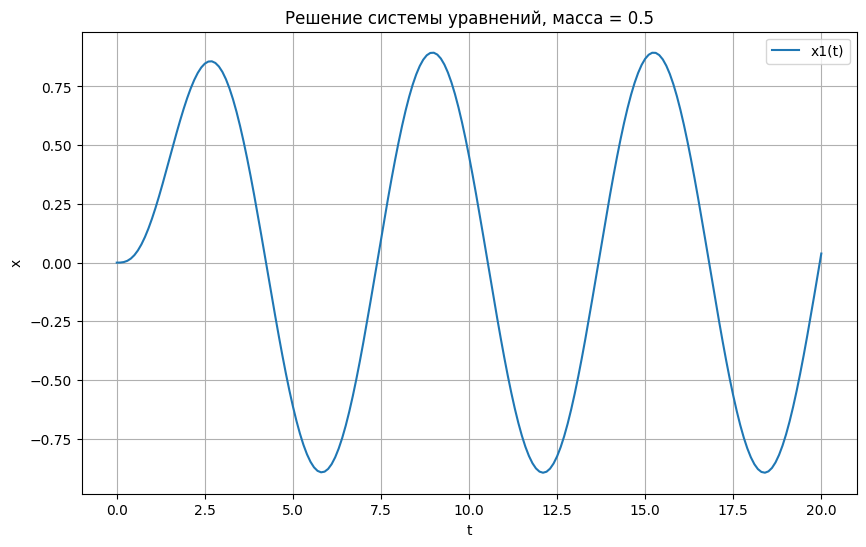

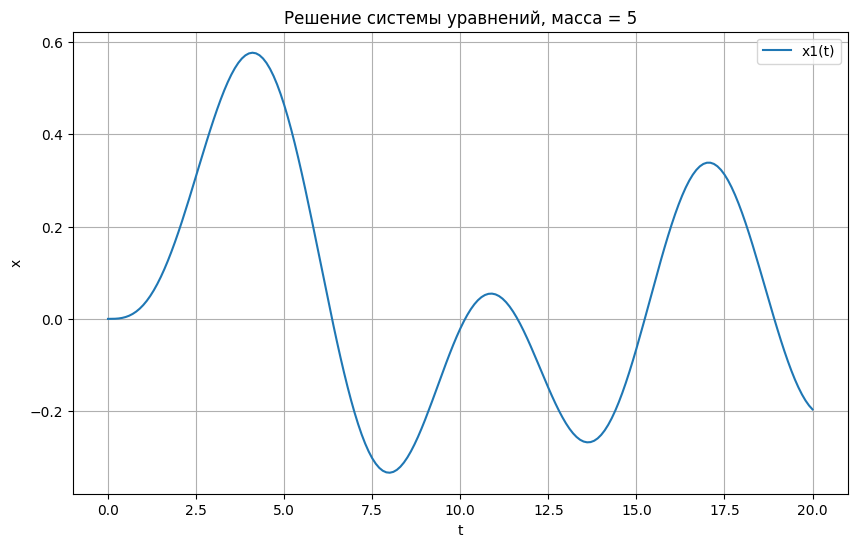

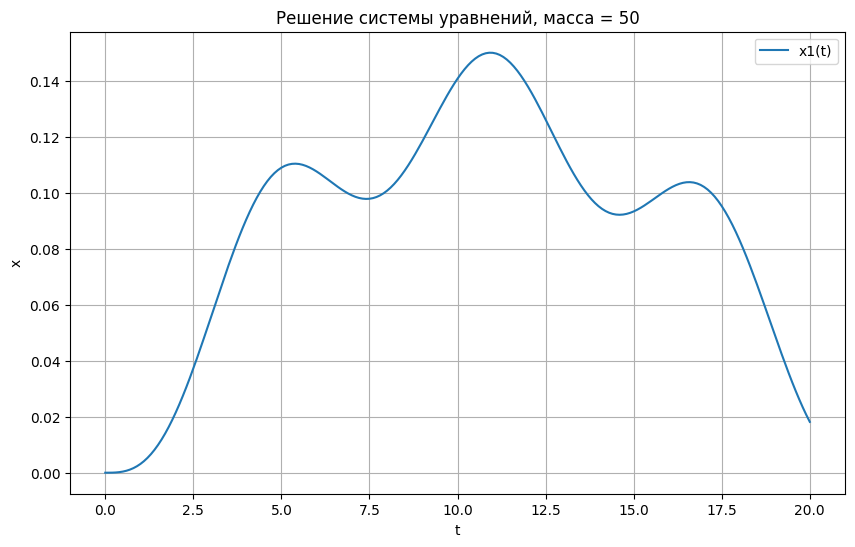

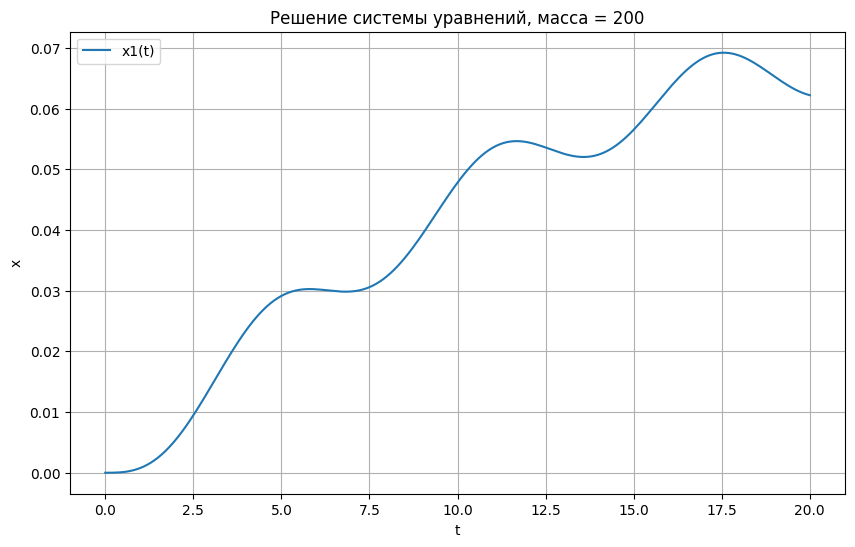

In [50]:

for mass in m:
    t, y = rkfixed(system, 0, y0, T, h, mass)
    x1 = y[:, 0]
    
    # Построение графиков
    plt.figure(figsize=(10, 6))
    plt.plot(t, x1, label='x1(t)')
    plt.xlabel('t')
    plt.ylabel('x')
    plt.legend()
    plt.title(f'Решение системы уравнений, масса = {mass}')
    plt.grid(True)
    plt.show()


# ======================= 7.6.2 =======================
